  #Exploratory Data Analytics(EDA) using a Real world sales data by Anduamlak_Y.

#Tasks
    # 1. What is the best month for sales? How much it  was earned ?
    # 2. Which city had the highest number of sales?
    # 3. What time should we display advertisment to maximize the liklihood of customer for buying products?
    # 4. what products are most often sold together?
    # 5. Segregate/Classify all the products with expensive product,mid range product and  cheapest ones?
    # 6. How much percentage more expensive is "#Macbook Pro Laptop" when compared to all products?


In [1]:
# To import the libraries for doing the analysis on the given data#
import pandas as pd
import numpy as np
import seaborn as sns
import sqldf
import plotly
import plotly.express as px
import datetime
sns.set_style('darkgrid')
#plt.style.use('dark_background')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None  # To omit default='warnings'

In [2]:
#Reading the csv master data
df_sales=pd.read_csv('allsalesdata.csv')

In [21]:
#Top-five records
df_sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#Droping the colum name:Unnamed:0 permanetly 
df_sales.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# The new sales dataframe 
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [26]:
#Total instance of data
df_sales.shape

(186850, 7)

In [5]:
#Checking the number of null values on each columns.
df_sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
#dropping null value permanetly
df_sales.dropna(inplace=True)

In [11]:
# Total number of data instances after dropping the null values.
df_sales.shape

(186305, 6)

# Task 1: What is the best month for sales? How much it  was earned ?

In [43]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
#Approach 1: Converting the Order Date column to datetime, but executing the ff code generates:
#Parse error: Unknown string format so that I've to fix it on the next cell. 
df_sales['Order Date']=pd.to_datetime(df_sales['Order Date'])
df_sales.head()

In [44]:
# The above error is due to the ff order date values and we have to exclude this row values from our dataframe
df_sales[df_sales['Order Date'].str[0:3]=='Ord']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
# New sales dataframe by excluding the above row values
df_sales_new=df_sales[df_sales['Order Date'].str[0:3]!='Ord']
df_sales_new.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [12]:
#Converting the Order Date column to datetime
df_sales_new['Order Date']=pd.to_datetime(df_sales_new['Order Date'])
df_sales_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [13]:
#Checking the datatype for Price Each
df_sales_new['Price Each'].dtype

dtype('O')

In [14]:
#Adding new columns : month and sale(Quantity Ordered *Price Each)
# And we need to chang the data type for Quantity Ordered and Price Each columns to numeric values.
df_sales_new['Quantity Ordered']=pd.to_numeric(df_sales_new['Quantity Ordered'])
df_sales_new['Price Each']=pd.to_numeric(df_sales_new['Price Each'])
df_sales_new['Month']=df_sales_new['Order Date'].dt.month
df_sales_new['Sales']=df_sales_new['Quantity Ordered'] * df_sales_new['Price Each']
df_sales_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [15]:
Product_month=df_sales_new.groupby('Month')['Sales'].sum().reset_index()
Product_month.columns=['Month','Sales']
Product_month

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


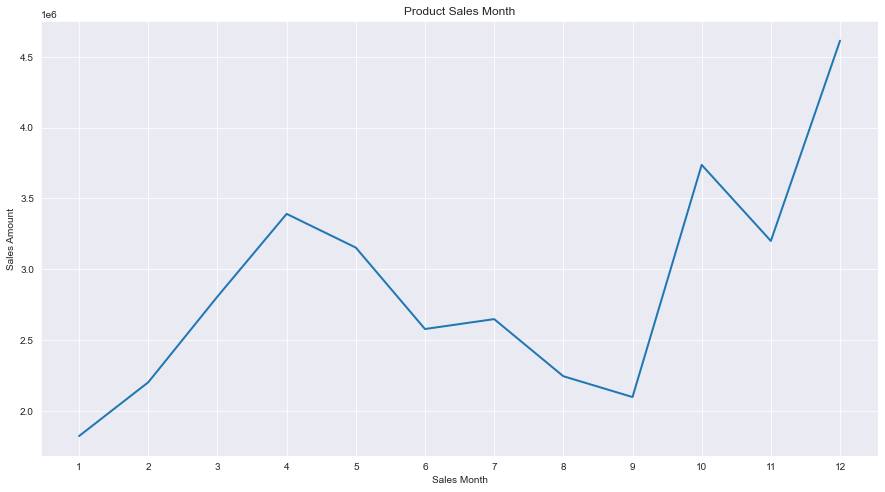

In [35]:
#Visualization using seaborn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
sns.lineplot(Product_month['Month'],Product_month['Sales'],data=Product_month,linewidth=2)
sns.set(rc={"axes.facecolor":"#FFFDE7", "axes.grid":True,'xtick.labelsize':14,'ytick.labelsize':14})
plt.title('Product Sales Month')
plt.xlabel('Sales Month')
plt.xticks(Product_month['Month'])
plt.ylabel('Sales Amount')
plt.show()
#Answer 1: October and Decemeber are the best monthes for selling products.

# Task 2. Which city had the highest number of sales?

In [52]:
df_sales_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [16]:
# Using List comprehension for Geeting the city column from Purchase Address .
pd.options.mode.chained_assignment = None  # To omit default='warnings'
df_sales_new['city']=[cities.split(',')[1] for cities in df_sales_new['Purchase Address']]
df_sales_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [17]:
city_sales=df_sales_new.groupby('city')['Sales'].sum().reset_index()
city_sales.columns=['city','Sum of total sales']
city_sales

,city,Sum of total sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


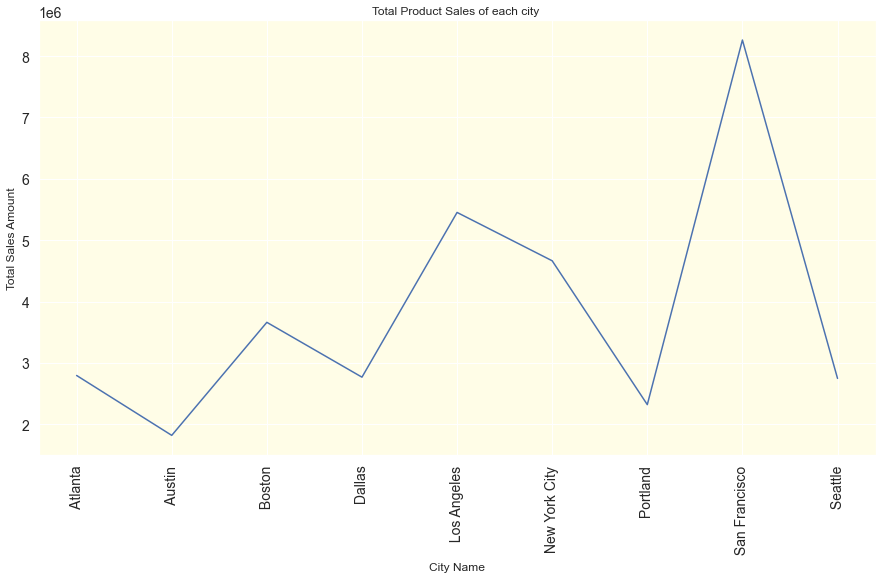

In [39]:
#Visualilzation
plt.figure(figsize=(15,8))
sns.lineplot(x=city_sales['city'],y=city_sales['Sum of total sales'],data=city_sales)
sns.set(rc={"axes.facecolor":"#FFFDE7", "axes.grid":True,'xtick.labelsize':14,'ytick.labelsize':14})
plt.title('Total Product Sales of each city ')
plt.xlabel('City Name')
plt.xticks(city_sales['city'],rotation='vertical')
plt.ylabel('Total Sales Amount')
plt.show()
# Answer 2: LOs Angeles and San fransisco are those cities with highest number of sales.  

# Task 3. What time should we display advertisment to maximize the liklihood of customer for buying products?

In [55]:
df_sales_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [18]:
#Geeting time from Order date
df_sales_new['hour']=df_sales_new['Order Date'].dt.hour
df_sales_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [19]:
ordered_time=df_sales_new.groupby('hour')['Order ID'].count().reset_index()
ordered_time.columns=['hour','Total_Orders']
ordered_time.sort_values('Total_Orders',ascending=False)

,hour,Total_Orders
19,19,12905
12,12,12587
11,11,12411
18,18,12280
20,20,12228
13,13,12129
14,14,10984
10,10,10944
21,21,10921
17,17,10899


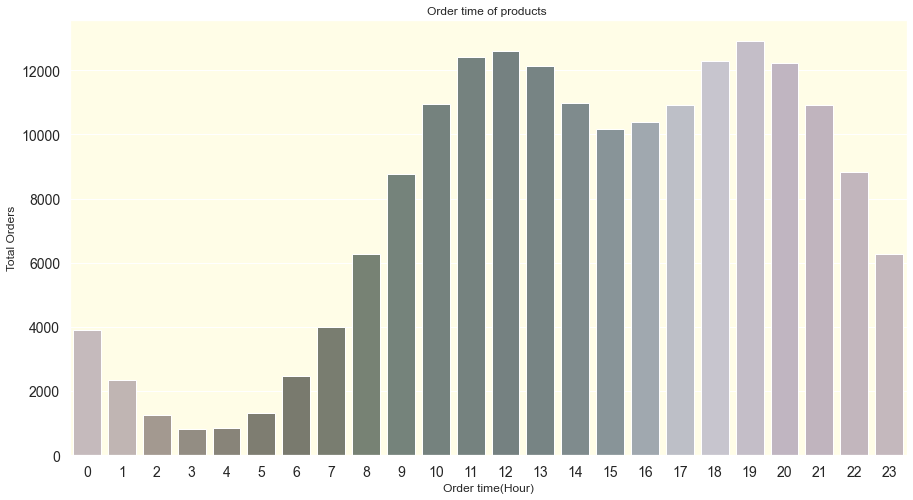

In [58]:
#Visualilzation
plt.figure(figsize=(15,8))
sns.barplot(x=ordered_time['hour'],y=ordered_time['Total_Orders'],data=ordered_time,saturation = 0.1)
sns.set(rc={"axes.facecolor":"#FFFDE7", "axes.grid":True,'xtick.labelsize':14,'ytick.labelsize':14})
plt.title('Order time of products ')
plt.xlabel('Order time(Hour)')
plt.xticks(ordered_time['hour'])
plt.ylabel('Total Orders')
plt.show()
#Answer : @ 12 and 19 are the right times to display advertisment to maximize the liklihood of customer for buying products

# Task 4. what products are most often sold together?

In [59]:
df_sales_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [20]:
# We need to find out prducts with the same Order Id:
product_sold=df_sales_new
product_sold.rename(columns={'Order ID':'Order_ID'},inplace=True)

In [21]:
# To group products with same order ID
product_sold['Group_Product']=product_sold.groupby('Order_ID')['Product'].transform(lambda x:",".join(x))
product_sold.head()

,Order_ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,hour,Group_Product
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,Wired Headphones


In [22]:
#To show products with the same order id
product_sold[product_sold['Order_ID'].duplicated(keep=False)]
product_sold.head(10)

,Order_ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,hour,Group_Product
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,Wired Headphones
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13,USB-C Charging Cable
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,7,Bose SoundSport Headphones
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,10,USB-C Charging Cable
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,10,Macbook Pro Laptop
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston,14,Wired Headphones


In [23]:
#consider Order_ID and Group columns for dropping duplicates
product_sold.drop_duplicates(subset=['Order_ID','Group_Product'],inplace=True)

In [24]:
# To check products which are sold altogether  
from itertools import combinations
from collections import Counter
count=Counter()
for rows in product_sold['Group_Product']:
    row_list=rows.split(',')
    count.update(Counter(combinations(row_list,2)))
print(count.most_common(5))
#Answer: iPhone and Lightning Charging Cable are products sold together in frequent manner

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]


# Task 5: Segregate/Classify all the products with expensive product,mid range product and the cheaper ones?

In [25]:
product_sold.rename(columns={'Price Each':'Price_Each'},inplace=True)

In [26]:
product_sold.head()

,Order_ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,Month,Sales,city,hour,Group_Product
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,Wired Headphones
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13,USB-C Charging Cable


In [45]:
#I've appllied SQL script to classify products.
segregation=   """
               select *,ntile(3) over(order by Price_Each desc) as segregation
               from product_sold
               """ 
ntile_segregation=sqldf.run(segregation)
ntile_segregation.head()

,index,Order_ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,Month,Sales,city,hour,Group_Product,segregation
0,9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.0,San Francisco,10,Macbook Pro Laptop,1
1,86,176639,Macbook Pro Laptop,1,1700.0,2019-04-28 16:14:00,"853 Cedar St, San Francisco, CA 94016",4,1700.0,San Francisco,16,Macbook Pro Laptop,1
2,90,176643,Macbook Pro Laptop,1,1700.0,2019-04-27 21:32:00,"373 Adams St, Boston, MA 02215",4,1700.0,Boston,21,Macbook Pro Laptop,1
3,93,176646,Macbook Pro Laptop,1,1700.0,2019-04-22 07:14:00,"657 Adams St, Portland, OR 97035",4,1700.0,Portland,7,Macbook Pro Laptop,1
4,136,176687,Macbook Pro Laptop,1,1700.0,2019-04-30 10:26:00,"121 Wilson St, Los Angeles, CA 90001",4,1700.0,Los Angeles,10,Macbook Pro Laptop,1


In [51]:
#Segregation result 1 means : highly expensive product, 2 means :medium level and 3 means cheaper one.
expensive_product=ntile_segregation[ntile_segregation['segregation']==1]
expensive_sql="""
      select distinct(Product) as Expensive_product,Price_Each from expensive_product
"""
sqldf.run(expensive_sql)
# Macbook Pro Laptop  is expensive one.

,expensive_product,Price_Each
0,Macbook Pro Laptop,1700.00
1,ThinkPad Laptop,999.99
2,iPhone,700.00
3,Google Phone,600.00
4,LG Dryer,600.00
5,LG Washing Machine,600.00
6,Vareebadd Phone,400.00
7,27in 4K Gaming Monitor,389.99
8,34in Ultrawide Monitor,379.99
9,Flatscreen TV,300.00


In [52]:
# Cheaper Product
cheaper_product=ntile_segregation[ntile_segregation['segregation']==3]
cheaper_sql="""
      select distinct(Product) as Cheaper_product,Price_Each from cheaper_product
"""
sqldf.run(cheaper_sql)
# AAA Batteries (4-pack) is the cheaper one.

,Cheaper_product,Price_Each
0,USB-C Charging Cable,11.95
1,AA Batteries (4-pack),3.84
2,AAA Batteries (4-pack),2.99


# Task  6. How much percentage more expensive is "#Macbook Pro Laptop" when compared to all products?

In [58]:
# I'm Using the window function  PERCENT_RANK .
# Formula = Current Row No - 1 / Total no of rows - 1 
product_ranking="""
    select *,
    percent_rank() over(order by Price_Each ) as percent_rank ,
    round(percent_rank() over(order by Price_Each ) * 100, 2) as percentage
    from df_sales_new 
"""
product_ranking_Mac=sqldf.run(product_ranking)
product_ranking_Mac[product_ranking_Mac['Product']=='Macbook Pro Laptop']
# Answer : Macbook Pro Laptop is 97.41% more expensive when we compared it to all other products.

,index,Order_ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,Month,Sales,city,hour,Group_Product,percent_rank,percentage
173813,9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.0,San Francisco,10,Macbook Pro Laptop,0.974092,97.41
173814,86,176639,Macbook Pro Laptop,1,1700.0,2019-04-28 16:14:00,"853 Cedar St, San Francisco, CA 94016",4,1700.0,San Francisco,16,Macbook Pro Laptop,0.974092,97.41
173815,90,176643,Macbook Pro Laptop,1,1700.0,2019-04-27 21:32:00,"373 Adams St, Boston, MA 02215",4,1700.0,Boston,21,Macbook Pro Laptop,0.974092,97.41
173816,93,176646,Macbook Pro Laptop,1,1700.0,2019-04-22 07:14:00,"657 Adams St, Portland, OR 97035",4,1700.0,Portland,7,Macbook Pro Laptop,0.974092,97.41
173817,136,176687,Macbook Pro Laptop,1,1700.0,2019-04-30 10:26:00,"121 Wilson St, Los Angeles, CA 90001",4,1700.0,Los Angeles,10,Macbook Pro Laptop,0.974092,97.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178432,186514,259041,Macbook Pro Laptop,1,1700.0,2019-09-13 23:14:00,"220 Sunset St, New York City, NY 10001",9,1700.0,New York City,23,Macbook Pro Laptop,0.974092,97.41
178433,186637,259157,Macbook Pro Laptop,1,1700.0,2019-09-12 05:01:00,"326 Forest St, Seattle, WA 98101",9,1700.0,Seattle,5,Macbook Pro Laptop,0.974092,97.41
178434,186787,259299,Macbook Pro Laptop,1,1700.0,2019-09-30 23:59:00,"240 Chestnut St, Los Angeles, CA 90001",9,1700.0,Los Angeles,23,Macbook Pro Laptop,0.974092,97.41
178435,186797,259308,Macbook Pro Laptop,1,1700.0,2019-09-26 19:16:00,"912 8th St, Boston, MA 02215",9,1700.0,Boston,19,Macbook Pro Laptop,0.974092,97.41
